# Peta Chloropeth Pemilihan Kepala Daerah (PILKADA) Majalengka 2013

Ariq Hakim Ruswadi - 140810200001

## Import Library

In [1]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from shapely import wkt
import numpy as np

## Membaca File SHP dan Slicing Untuk Daerah Majalengka

In [104]:
map=gpd.read_file('./maps/kecamatan/BATAS KECAMATAN DESEMBER 2019 DUKCAPIL.shp')
map.head()

,KECAMATAN,geometry
0,None,"MULTIPOLYGON (((116.20336 -8.75440, 116.20314 ..."
1,2 X 11 ENAM LINGKUANG,"POLYGON ((100.29027 -0.56083, 100.29583 -0.564..."
2,2 X 11 KAYU TANAM,"POLYGON ((100.33201 -0.48829, 100.33238 -0.488..."
3,ABAB,"POLYGON ((104.24498 -3.09621, 104.24389 -3.103..."
4,ABANG,"MULTIPOLYGON (((115.07579 -8.53740, 115.07606 ..."


<AxesSubplot:>

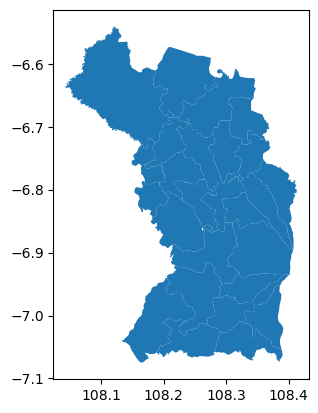

In [4]:
kecamatan_majalengka = [
    'ARGAPURA', 'KADIPATEN', 'SINDANG', 'CIGASONG', 'RAJAGALUH', 'KERTAJATI', 'BANJARAN',
    'SUKAHAJI', 'MAJA', 'LEUWIMUNDING', 'PALASAH', 'JATITUJUH', 'SINDANGWANGI', 'LEMAHSUGIH',
    'LIGUNG', 'DAWUAN', 'CIKIJING', 'MALAUSMA', 'SUMBERJAYA', 'PANYINGKIRAN', 'KASOKANDEL',
    'BANTARUJEG', 'CINGAMBUL', 'TALAGA', 'MAJALENGKA', 'JATIWANGI'
]
map_majalengka = map[map['KECAMATAN'].isin(kecamatan_majalengka)]

# ada beberapa kecamatan yang bukan di majalengka tetapi namanya sama, kita coba remove manual
map_majalengka = map_majalengka.explode(index_parts = 1).reset_index()
map_majalengka = map_majalengka.drop([1,8,11,18,20,22,28], axis=0)
map_majalengka = map_majalengka.drop(columns = ['level_0', 'level_1'])
map_majalengka.plot()

## Membaca Data Paslon Untuk Setiap Kecamatan

In [53]:
data_paslon = pd.read_csv('./datasets/paslon_majalengka.csv', sep=';')
data_paslon.head()

,KECAMATAN,Paslon1,Paslon2,Paslon3,Paslon4
0,ARGAPURA,684,13786,1762,4725
1,KADIPATEN,1113,10651,5154,7609
2,SINDANG,270,4652,763,3309
3,CIGASONG,1077,10408,2818,5356
4,RAJAGALUH,1138,10525,2575,8222


## Method Pemetaan

In [36]:
def calculate_limits(index, dataset):
    data = dataset[index].tolist()
    average = np.mean(data)
    std = np.std(data, ddof=0)
    n = 1
    upper_limit = average + n * std
    lower_limit = average - n * std

    return upper_limit, lower_limit

In [119]:
def create_map(index, data):
  upper_limit, lower_limit = calculate_limits(index,data)

  condition_red = data[index] < lower_limit
  condition_green = data[index] > upper_limit

  color = np.empty(data.shape[0], dtype=object)

  color[condition_red] = 'red'
  color[condition_green] = 'green'
  color[~(condition_red | condition_green)] = 'orange'

  data['WARNA'] = color

  colors = ['green', 'orange', 'red']

  merged_map =  map_majalengka.merge(data, on = 'KECAMATAN', how='outer')

  fig, ax = plt.subplots(1, 1, figsize=(12, 12))
  cmap = (matplotlib.colors.ListedColormap(['green', 'orange', 'red']))
  merged_map.plot(column='WARNA', cmap=cmap, legend=True, ax=ax, edgecolors='k', linewidth=0.5)

  lower_limit_str = f'{lower_limit:.2f}'
  upper_limit_str = f'{upper_limit:.2f}'

  from matplotlib.lines import Line2D
  legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'< {lower_limit_str}', markerfacecolor=colors[2], markersize=10),
                    Line2D([0], [0], marker='o', color='w', label=f'{lower_limit_str} - {upper_limit_str}', markerfacecolor=colors[1], markersize=10),
                    Line2D([0], [0], marker='o', color='w', label=f'> {upper_limit_str}', markerfacecolor=colors[0], markersize=10)]

  ax.legend(handles=legend_elements, title='Jumlah Suara')
  plt.title("Pemetaan Perolehan Suara " + index)
  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):
      ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
      plt.axis('off')
  plt.show()

## Hasil Peta

C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1895944199.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):
C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1895944199.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):


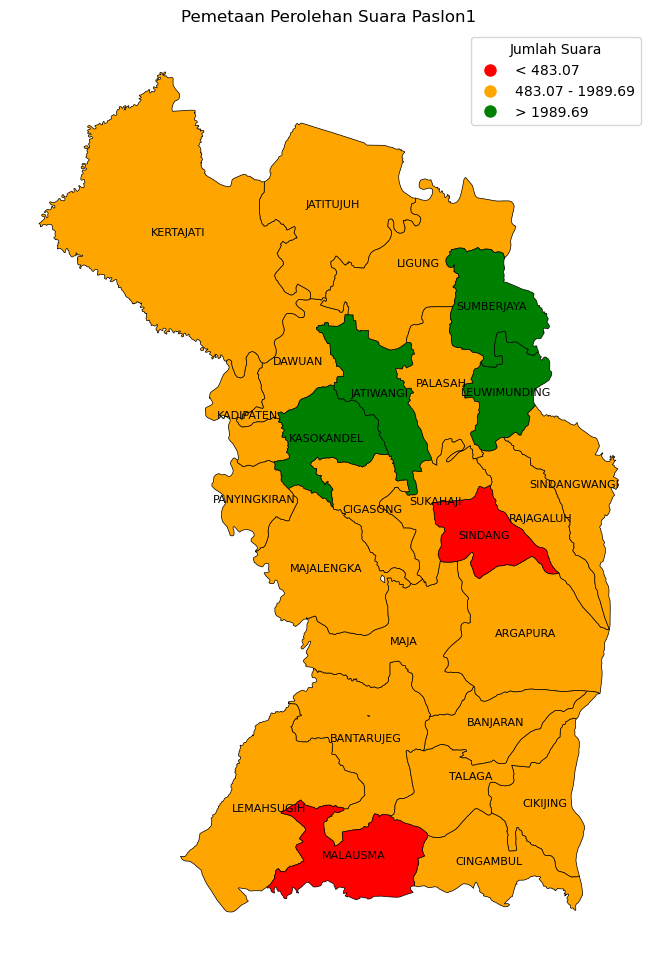

In [120]:
create_map('Paslon1', data_paslon)

C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1895944199.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):
C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1895944199.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):


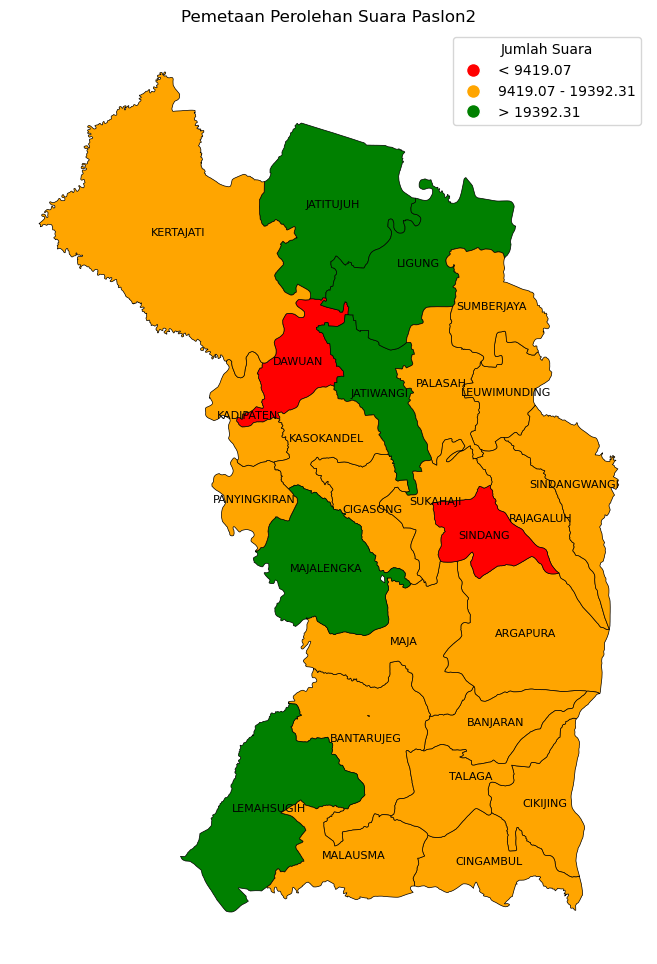

In [121]:
create_map('Paslon2', data_paslon)

C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1895944199.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):
C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1895944199.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):


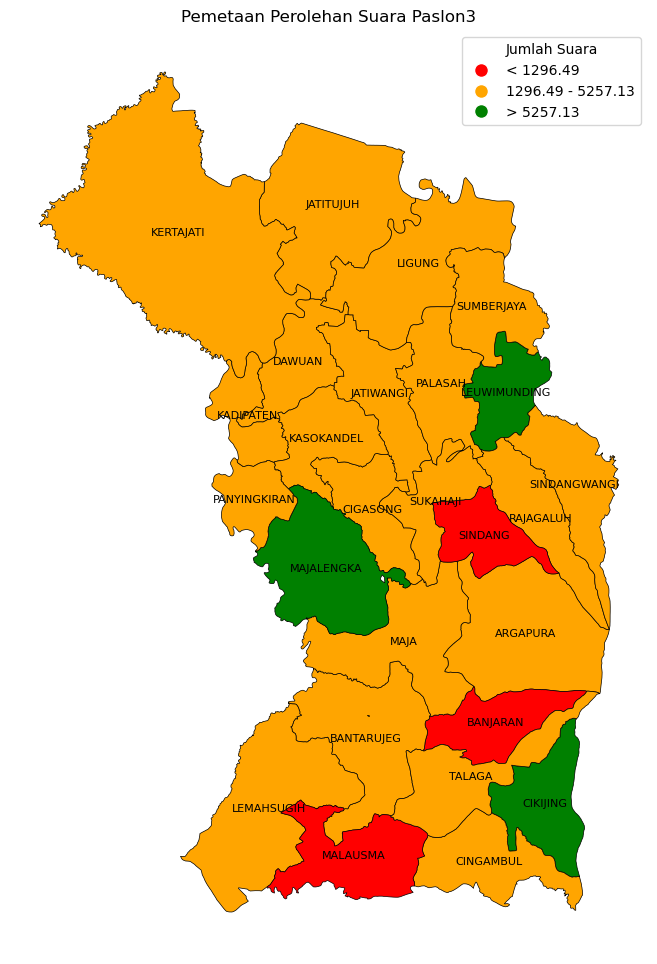

In [122]:
create_map('Paslon3', data_paslon)

C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1895944199.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):
C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1895944199.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map['KECAMATAN']):


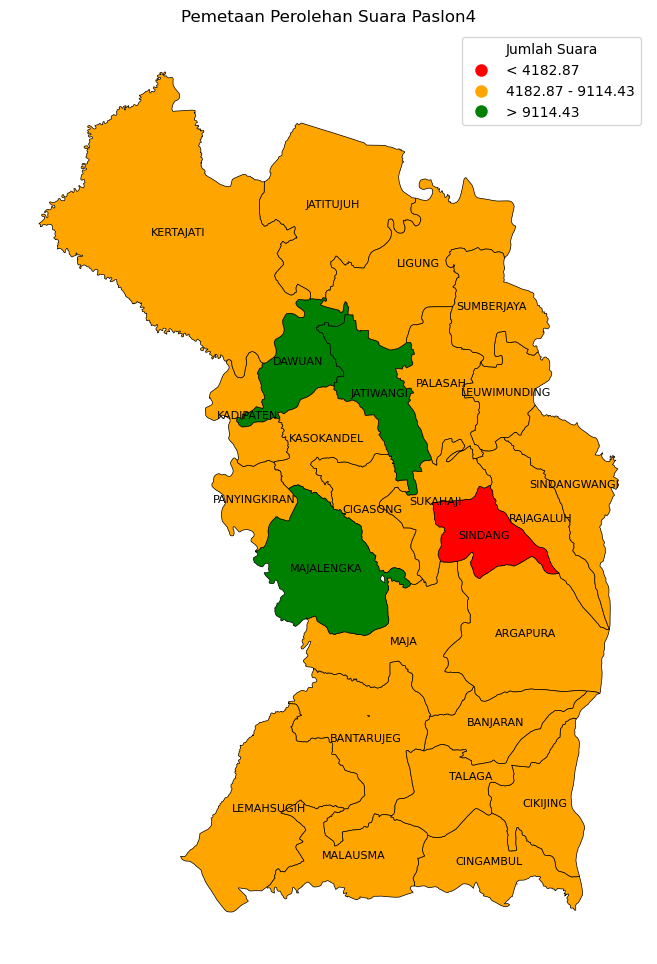

In [123]:
create_map('Paslon4', data_paslon)

C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1944938751.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(rekap.geometry.centroid.x, rekap.geometry.centroid.y, rekap['KECAMATAN']):
C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_17252\1944938751.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(rekap.geometry.centroid.x, rekap.geometry.centroid.y, rekap['KECAMATAN']):


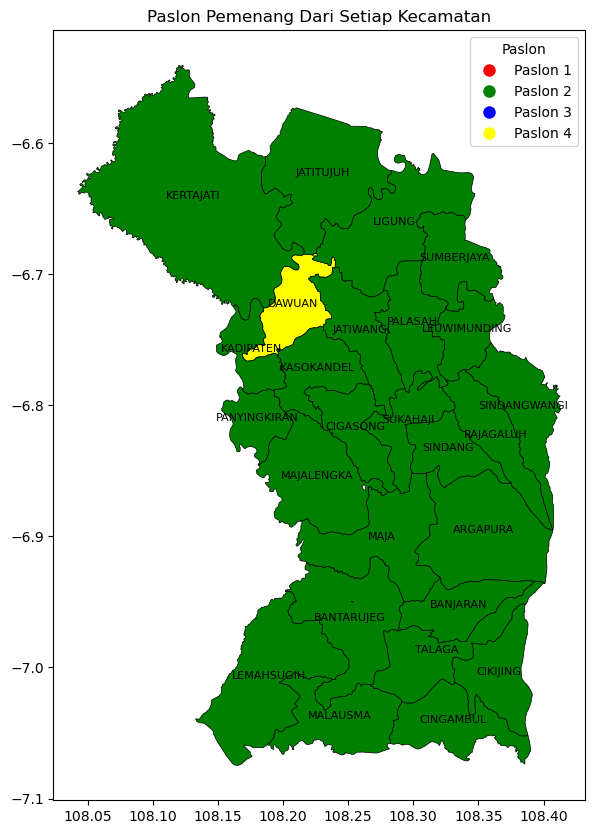

In [124]:
rekap = map_majalengka.merge(data_paslon, on = 'KECAMATAN', how='outer')
rekap['Pemenang'] = rekap[['Paslon1', 'Paslon2', 'Paslon3', 'Paslon4']].idxmax(axis=1)

color_schema = {'Paslon1': 'red', 'Paslon2': 'Green', 'Paslon3': 'Blue', 'Paslon4': 'yellow'}

rekap['Warna'] = rekap['Pemenang'].map(color_schema)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
rekap.plot(ax=ax, color=rekap['Warna'], edgecolor='black', linewidth=0.5)

for x, y, label in zip(rekap.geometry.centroid.x, rekap.geometry.centroid.y, rekap['KECAMATAN']):
    ax.text(x, y, label, fontsize=8, ha='center')

plt.title("Paslon Pemenang Dari Setiap Kecamatan", fontsize=12)
categories = ['Paslon 1', 'Paslon 2', 'Paslon 3', 'Paslon 4']
colors = ['Red', 'Green', 'Blue', 'Yellow']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=cat, markersize=10, markerfacecolor=col) for cat, col in zip(categories, colors)]
plt.legend(handles=legend_handles, title="Paslon")

plt.show()